**Integration initialization**
* $p_0$
* $v_0$

**Integration conditions**:

* $dt$: finite difference stepsize of $f$ to get $A$: be careful of numerical underflow, especially near the boundaries
* tol: tolerance in numerical differentiation; doesn't change the results, but affects dramatically the integration time
* $(J^T J)^{-1}$: regular, $\lambda$ or pseudo-inverse; its scale compared to $\mathbf{\sigma_{-1}^2}$ matters


* $dt$: integration stepsize; it matters - why??


* Constant speed: better to be 'p', as, if it is 'y', integration stepsize has to be very small when close to boundaries to not step beyond them

**Termination conditions**:

* $v$:
* $V$:
* $\sigma_{-1}$: 
* $|J^T J|$: 
* $t_{max}$
* ncall

In [2]:
%matplotlib inline

from __future__ import division
from collections import OrderedDict as OD

from util import butil, plotutil

from infotopo import predict, geodesic
reload(predict)
reload(geodesic)

pred = predict.Predict.from_pickle('../../ModelReduction/Path/pred_path2mmke_jc')

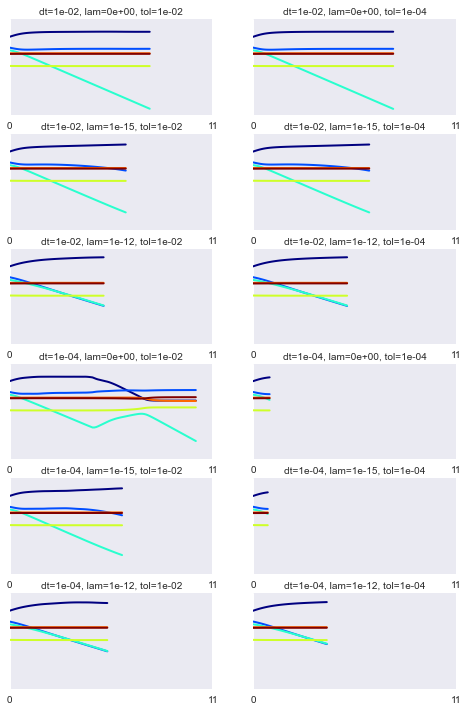

In [3]:
axs = plotutil.get_axs(nrow=6, ncol=2, figsize=(8, 12))

p0 = pred.p0.randomize(sigma=1, seed=3)
tmax = 10

dts = [1e-2, 1e-4]
lams = [0, 1e-15, 1e-12]
tols = [1e-2, 1e-4]
conds_intgr = butil.get_product(dts, lams, tols)

cond2gds = OD()
for cond_intgr, ax in zip(conds_intgr, axs):
    kwargs = dict(zip(['dt', 'lam', 'rtol', 'atol'], cond_intgr+(cond_intgr[-1],)))
    gds = pred.get_geodesic(p0=p0, ptype='logp', idx_eigenv=-3, uturn=False,
                            inv='lam', callback='singval', param_cb=1e-10, **kwargs)
    gds.integrate(tmax=tmax, dt=0.1, print_step=0, maxncall=2000)
    gds.ptraj.plot(ax=ax, colorscheme='jet', 
                   xylims=[[0,tmax+1], [-8,4]], xyticks=[[0,tmax+1],[]],
                   title='dt=%.0e, lam=%.0e, tol=%.0e'%cond_intgr)
    cond2gds[cond_intgr] = gds

# Integration stepsize matters as well!

why?

In [25]:
gds_stepsize1 = pred.get_geodesic(p0=pred.p0.randomize(sigma=1, seed=0), 
                                  ptype='logp', idx_eigenv=-6, uturn=False, 
                                  callback='singval', param_cb=1e-9)

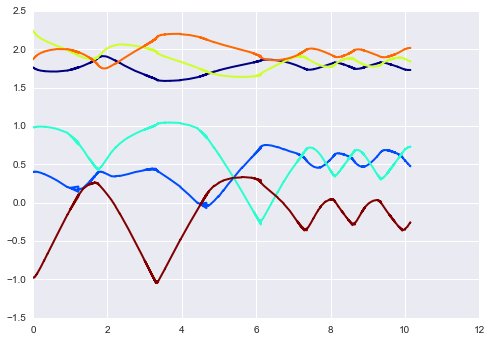

In [26]:
gds_stepsize1.integrate(tmax=10, dt=0.1)
gds_stepsize1._ptraj.plot(colorscheme='jet')

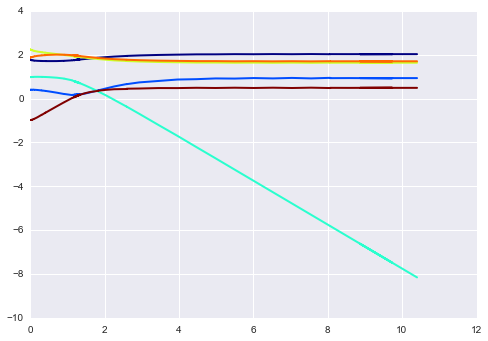

In [27]:
gds_stepsize2 = gds_stepsize1.reset()
gds_stepsize2.integrate(tmax=10, dt=0.01)
gds_stepsize2._ptraj.plot(colorscheme='jet')